   * Which individuals are are likely to have or use bank accounts in Rwanda, Kenya, Uganda and Tanzania?
  * Which demographic factors are likely to have driven the outcome?
*   Does their geographical location have influence on the count of this accounts
*   Does the level of education affect this?



In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import sys
import seaborn as sns
import plotly.express as px
from scipy import stats


%matplotlib inline

In [ ]:
# Load the financial dataset
# Preview the top rows and their respective columns
#Dataset='https://bit.ly/FinancialDataset'
fin_data=pd.read_csv('/Financial Dataset - 1(2).csv')
fin_data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**Observation**

*   Gets the first 5 rows in the dataset

*   Know that i have the right data to work on

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Check the number of rows and columns
fin_data.shape

(23524, 13)

**Observation**


*   There are 23,524 rows and 13 columns in our dataset




In [ ]:
# Get the information about the dataframe
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


**Observation**



*   The dataset has 23524 rows and 13 columns: from index 0 to 23,524
*   The memory size is 2.3+ MB


*   We have null values in 11 out of the 13 columns
*   The data type of each column has been outlined




In [ ]:
# Fix the messy column titles
fin_data.columns=fin_data.columns.str.strip().str.lower().str.replace(' ', '_')
#fin_data.columns
fin_data.rename(columns= {'the_relathip_with_head' : 'the_relationship_with_head'}, inplace=True)
fin_data.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**Observation**


*   Removed the whitespaces in the column titles
*   Renamed the column title 'the_relathip_with_head' to 'the_relationship_with_head'} (Spelling error)



In [ ]:
#Descriptive statistics:to summarize the measures of central tendency and dispersion
# Excludes NaN
# Captures numerical columns
fin_data.describe()

,year,household_size,respondent_age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


**Observation**



*   The mean of the respondents age and household size is 38.80 and 3.68 respectively
*   The minimum and maximum years from which the data was extracted is 2016 to 2056
    

*   The year 2056 must be an outlier; far from the years 2016-2018 when the data was extracted from finscope surveys

*   The household_size and respondent ages have outliers ie values far from the mean.


*   Note: outliers affect the mean










In [ ]:
# Check if there are any missing values in our dataset
fin_data.isnull().values.any()

True

**Observation**


*   **True** indicates that we have null values in the data


In [ ]:
# Return the total count of missing values

print(fin_data.isnull().sum().sum())

267


**Observation**
*        
The total number of missing values is 267

In [ ]:
#Handle the missing values
fin_data= fin_data.fillna(method='ffill')
print(fin_data)

      country  year       uniqueid has_a_bank_account type_of_location  \
0       Kenya  2018     uniqueid_1                Yes            Rural   
1       Kenya  2018     uniqueid_2                 No            Rural   
2       Kenya  2018     uniqueid_3                Yes            Urban   
3       Kenya  2018     uniqueid_4                 No            Rural   
4       Kenya  2018     uniqueid_5                 No            Urban   
...       ...   ...            ...                ...              ...   
23519  Uganda  2018  uniqueid_2113                 No            Rural   
23520  Uganda  2018  uniqueid_2114                 No            Rural   
23521  Uganda  2018  uniqueid_2115                 No            Rural   
23522  Uganda  2018  uniqueid_2116                 No            Urban   
23523  Uganda  2018  uniqueid_2117                 No            Rural   

      cell_phone_access  household_size  respondent_age gender_of_respondent  \
0                   Yes        

In [ ]:
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     23524 non-null  object 
 1   year                        23524 non-null  int64  
 2   uniqueid                    23524 non-null  object 
 3   has_a_bank_account          23524 non-null  object 
 4   type_of_location            23524 non-null  object 
 5   cell_phone_access           23524 non-null  object 
 6   household_size              23524 non-null  float64
 7   respondent_age              23524 non-null  float64
 8   gender_of_respondent        23524 non-null  object 
 9   the_relationship_with_head  23524 non-null  object 
 10  marital_status              23524 non-null  object 
 11  level_of_educuation         23524 non-null  object 
 12  type_of_job                 23524 non-null  object 
dtypes: float64(2), int64(1), object

**Observation**


*   Used 'Forward fill' to propagate the last valid observation forward. 

*   We have no null values as shown from the output above(23,524 rows)
*   





In [ ]:
# Check if there is any missing values in the new dataset(fin_data1)
fin_data.isnull().values.any()

False

**Observation**


*   The output **False** indicates that we have no null values
*  All the missing values have been handled





In [ ]:
# Confirm the number of missing values in each column
fin_data.isnull().sum()

country                       0
year                          0
uniqueid                      0
has_a_bank_account            0
type_of_location              0
cell_phone_access             0
household_size                0
respondent_age                0
gender_of_respondent          0
the_relationship_with_head    0
marital_status                0
level_of_educuation           0
type_of_job                   0
dtype: int64

**Observation**



*   The are no missing values in the 13 columns






In [ ]:
#Check for unique values in the "year" column

fin_data['year'].unique()
fin_data['year'].value_counts()


2016    8734
2018    8167
2017    6620
2029       1
2056       1
2039       1
Name: year, dtype: int64

**Observation**


*   3 years out of the scope(2016-2018)


****

In [ ]:
#Find outliers using a scatter plot

fin_data_with_outliers = px.scatter(x=fin_data["respondent_age"],y=fin_data["year"])
fin_data_with_outliers.show()

**Observation**


*   The year 2029, 2039 and 2056 are outliers and have to be handled


*   We can drop the 3 years





In [ ]:
#Obtain the row with outliers
outlier_years= fin_data[fin_data['year'] >2018] #|| fin_data[fin_data['year'] <2016]
outlier_years

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


**Observation**


*  We have the respective rows for the 3 outliers; we can drop row 213, 308, 7014




In [ ]:
#Drop the 3 rows with outliers
fin_data.drop([213,308,7014], inplace=True, axis=0)

In [ ]:
# Calculate statistical data
fin_data.describe()

,year,household_size,respondent_age
count,23521.000000,23521.000000,23521.000000
mean,2016.975894,3.680073,38.798350
std,0.847348,2.279377,16.516497
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


**Observation**
*   Mean household_size=3.6
*   Mean age=38.8
*   Household size std=2.3
*   Age std=16.5
*   Max year has changed to 2018 from 2056
*   This means we have dropped the year 2056 (0ne of the outliers)



In [ ]:
#Check the rows and columns
fin_data.shape

(23521, 13)

**Observation**
We have dropped 3 rows

*   Rows have reduced from 23343 to 23340
*  Handled the outliers detected in the scatter plot




**UNIVARIATE ANALYSIS**

    One variable analysis

In [ ]:
#afrequency distribution table to show the number of people with  bank aacounts
fin_data['has_a_bank_account'].value_counts()

No     20197
Yes     3324
Name: has_a_bank_account, dtype: int64

**Observation**

*   The majority of the respondents don't own bank accounts.



In [ ]:
#Frequency table to show the count of the respondents with bank accounts
fin_data['cell_phone_access'].value_counts()


Yes    17449
No      6072
Name: cell_phone_access, dtype: int64

**Observation**

*   The majority of the respondents have access to cellphone



In [ ]:
#Checking the count of the gender of the respondents
fin_data['gender_of_respondent'].value_counts()

Female    13875
Male       9646
Name: gender_of_respondent, dtype: int64

**Observation**

*   The majority of the respondents were female.




In [ ]:
#Frequency table to show the count of population in rural and in urban areas
fin_data['type_of_location'].value_counts()

Rural    14342
Urban     9179
Name: type_of_location, dtype: int64

**Observation**

*   Majority of the respondents reside in rural area.



In [ ]:
#Frequency table to show the number of people in the different types of jobs.
fin_data['type_of_job'].value_counts()

Self employed                   6437
Informally employed             5586
Farming and Fishing             5442
Remittance Dependent            2523
Other Income                    1080
Formally employed Private       1054
No Income                        627
Formally employed Government     387
Government Dependent             259
Dont Know/Refuse to answer       126
Name: type_of_job, dtype: int64

**Observation**

*   Most are self employed and informally employed and others are farmers.





In [ ]:
#Frequency table to the show the number of people in different level of education.
fin_data['level_of_educuation'].value_counts()

Primary education                  12782
No formal education                 4527
Secondary education                 4219
Tertiary education                  1155
Vocational/Specialised training      803
6                                     27
Other/Dont know/RTA                    8
Name: level_of_educuation, dtype: int64

**Observation**

*   The level of education for the majority of the population is primary education.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



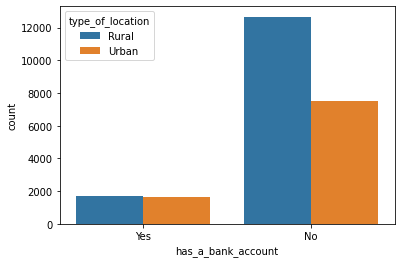

In [ ]:
#Visualize the count of the respondents with bank accounts in a bar plot
#Distinguish how many were in rural and urban areas
sns.countplot(fin_data.has_a_bank_account,hue=fin_data.type_of_location)
plt.show()

**Observation**        
*   Most of the respondents don't have bank accounts
*   Majority of those with no bank accounts reside in rural areas
*  Only about 2,000 respondents had bank acounts in both rural and urban areas


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



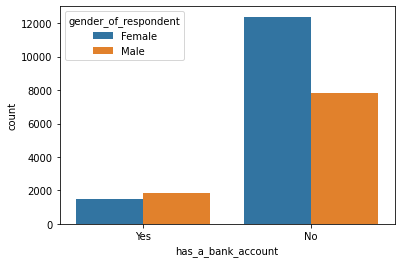

In [ ]:
##Visualize the count of the respondents with bank accounts
#Distinguish their count based on their gender
sns.countplot(fin_data.has_a_bank_account,hue=fin_data.gender_of_respondent)
plt.show()

**Observation**

*   There are more males with bank accounts than females
*   More females did not have a bank account as compared to males
*   Female count with no accounts are approximately 12,000
*   Male count without account is about 8,0000





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



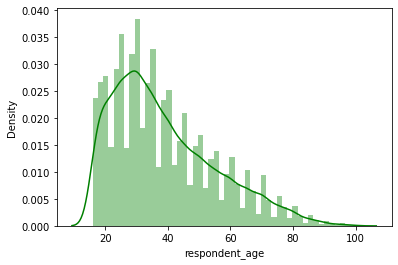

In [ ]:
# Check the ditribution of the respondents' age
# kde=True will enable the Kernel Density Plot along with the distplot
# Visualize plots adjacent to each other
#fig, axes= plt.subplots(1,2)
sns.distplot(fin_data.respondent_age, hist=True, kde=True,color='g')
plt.show()


**Observation**
*  Distribution starts from about 16 to 100
*  The distribution is right-skewed i.e positively skewed(tail is on the right)
*  The ditribution is leptokurtic; high degree peakedness; Kurtosis greater than 0
*  This indicates the presence of outliers




  





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



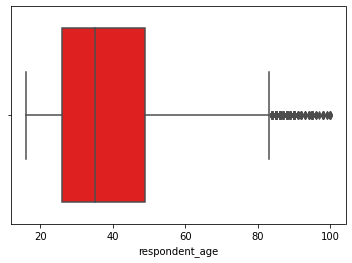

In [ ]:
#Find out the range of the respondents age
sns.boxplot(fin_data.respondent_age, color='r')
plt.show()

**Observation**
*   The average age is about 38
*   Minimum is about 20 and max 80
*   Ages above 80 are outliers





**BIVARIATE ANALYSIS**


> The relationship between 2 variables



**Bar chart**

Text(0, 0.5, 'Average Age')

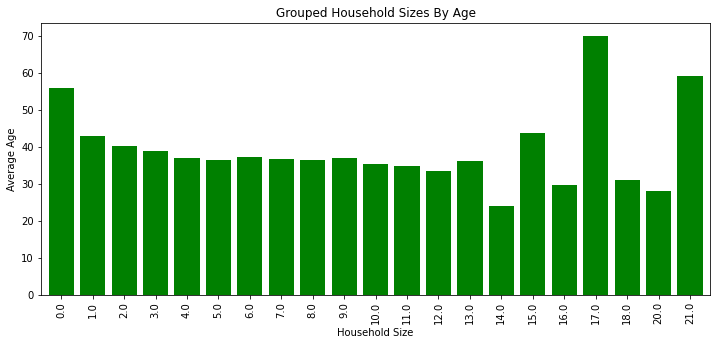

In [ ]:
# Bar chart of the "household size" vs " respondent age"
# Use mean
fin_data.groupby('household_size')['respondent_age'].mean().plot.bar(color='green', width=0.8,figsize=(12,5))
plt.title('Grouped Household Sizes By Age')
plt.xlabel('Household Size')
plt.ylabel('Average Age')

**Observation**


*   Most respondents surveyed from the different households had an average age of 40 years.



Text(0, 0.5, 'Average Household Size')

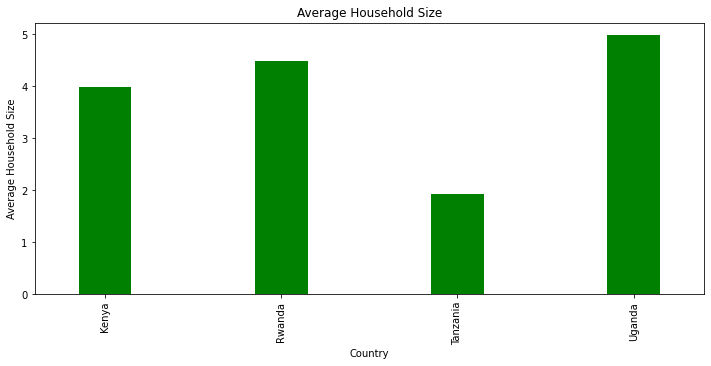

In [ ]:
# Find the average mean size of the households surveyed in Kenya, Uganda, Tanzania, and Rwanda
fin_data.groupby('country')['household_size'].mean().plot.bar(color='green', width=0.3,figsize=(12,5))
plt.title('Average Household Size')
plt.xlabel('Country')
plt.ylabel('Average Household Size')

**Observation**


*   The households surveyed in Kenya had an average of 4 respondents
*   The households surveyed in Rwanda had an average of 5 respondents
*   The households surveyed in Tanzania had an average of  about 2 respondents
*  The households surveyed in Uganda had an average of 5 responspondents





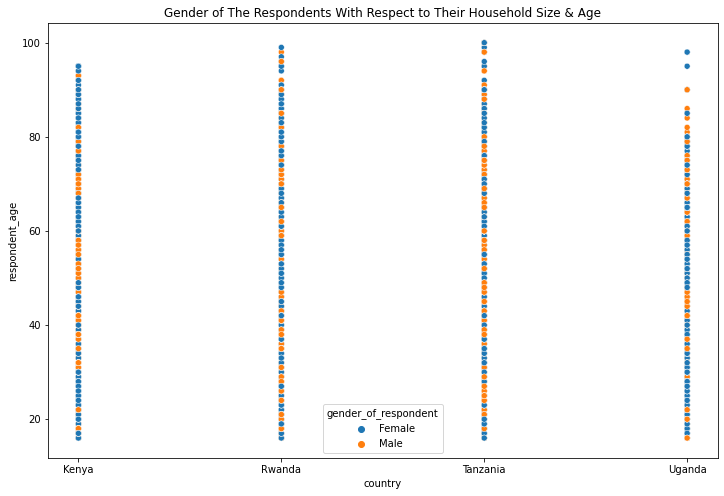

In [ ]:
#Scatterplot to show the gender and the corresponding age of the respondents in the various households
# Specify with gender
plt.figure(figsize= (12,8))
sns.scatterplot(x='country', 
                y='respondent_age',
                data=fin_data, 
                hue='gender_of_respondent')
plt.title('Gender of The Respondents With Respect to Their Household Size & Age')
plt.xlabel('country')
plt.ylabel('respondent_age')
plt.show()


**Observation**


*
*   



**CORRELATION**

In [ ]:
##Check for the correlation between the respondents' household sizes and their age
#fin_data.corr(method='pearson')
fin_data['household_size'].corr(fin_data['respondent_age'])

-0.11880245164961925

In [ ]:
##Check for the correlation between years and the respondents' households sizes

fin_data['household_size'].corr(fin_data['year'])

-0.053126807960839656

**Observation**


*   There is no association between the respondents' household sizes and the years when the surveys were done



In [ ]:
#Check for the correlation between years and the respondents' age
fin_data['year'].corr(fin_data['respondent_age'])

-0.018921469860580905

**Observation**


*   There is no association between the respondents' age and the years when the surveys took place



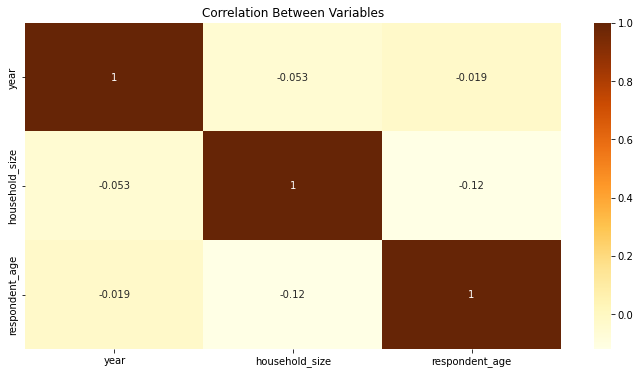

In [ ]:
# Check for correlations between variables(numerical)
# Use a heatmap '''annot=true to show the values
# 1 to 1 correlation shows a strong relationship
plt.figure(figsize= (12,6))
sns.heatmap(fin_data.corr(),annot =True, cmap='YlOrBr')
plt.title('Correlation Between Variables')
#plt.xlabel('Respondent_age')
#plt.ylabel('Household Size')
plt.show()

**Observation**


*   Each 2 variables have a weak correlation
*   The variables have a negative weak correlation
*   





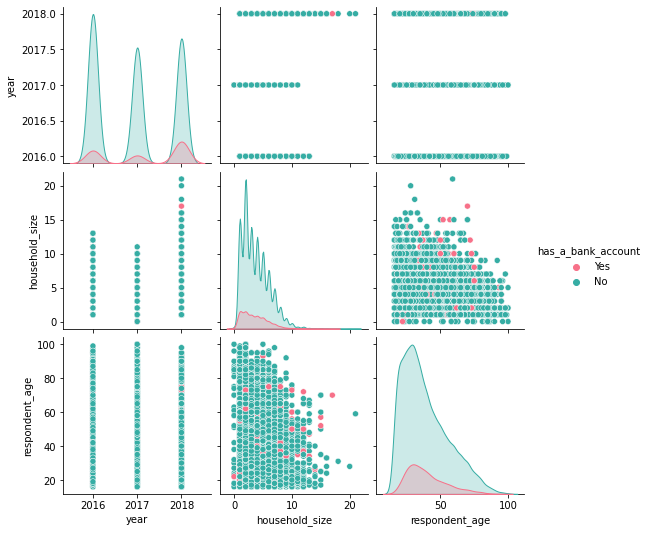

In [ ]:
# Pairplot

sns.pairplot(fin_data, hue='has_a_bank_account', palette='husl')
plt.show()


**Observation**
*   Respondents with bank accounts are between 20 to 75 years old.
*   The number if those with accounts reduce with age;the elderly have fewer





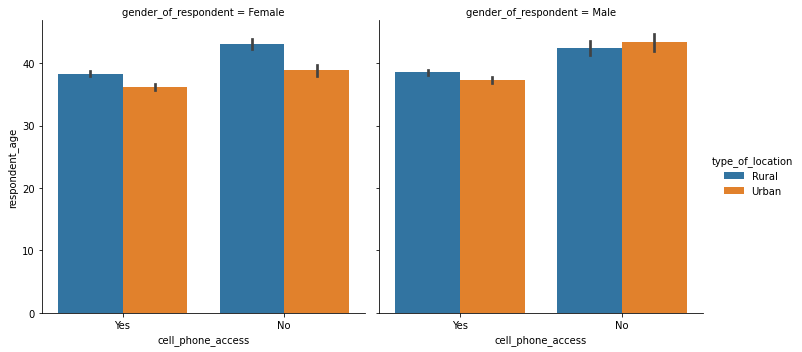

In [ ]:
#Categorical plot
# Respondent's age and phone access
# A breakdown by the gender and location of the respondents
sns.catplot(y='respondent_age', x='cell_phone_access', data=fin_data, kind= 'bar', hue='type_of_location',col='gender_of_respondent')
plt.show()

**Observation**

*  Females in rural areas have no access to phones as compared to those in urban ares
*  More males in rural areas have no phone access than those in urban areas
*   Both genders in rural areas have more access to phones than their counterparts in the urban areas




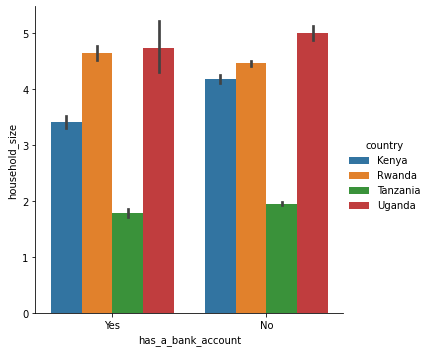

In [ ]:
#Household size per country
sns.catplot(x='has_a_bank_account', y='household_size', data=fin_data, kind= 'bar', hue='country')
plt.show()  

**Observation**


*   Tanzania's household has an average of 2 respondents
*  Rwanda's households with slightly above 4 people had bank accounts.



**Multivariate Analysis**

Method of Choice Principal Component Analysis

*  Use the same data type; convert categorical variables to numeric
*  Convert categorical variables to numeric
*  Project the initial data into reduced space using principal components
*   Features with more variance is good;has more features for an algorithm to learn
*   Data is skewed
*  Models P(X)


Reasons Dropping Linear Discriminant Analysis
*  Data should be normally distributed;in this case it is skewed
*  Each class should have idential covariance matrices
*  Models P(X|Y)

Reasons Factor Analysis
*   Suited for highly correlated sets of numeric variables;in this case our variables have weak or no correlation
*  Therefore, we cannot divide the variables based on their correlation into different groups, each represented by a factor















In [ ]:
#We are recalling our dataset
fin_data.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,uniqueid_uniqueid_1,uniqueid_uniqueid_10,uniqueid_uniqueid_100,...,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#A look at the statistics summary
fin_data.describe()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,uniqueid_uniqueid_1,uniqueid_uniqueid_10,uniqueid_uniqueid_100,...,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
count,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.00000,23521.00000,23521.00000,...,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000
mean,2016.975894,3.680073,38.798350,0.257897,0.371328,0.281451,0.089324,0.00017,0.00017,0.00017,...,0.005357,0.231368,0.016453,0.044811,0.011011,0.237490,0.026657,0.045916,0.107266,0.273670
std,0.847348,2.279377,16.516497,0.437486,0.483170,0.449716,0.285218,0.01304,0.01304,0.01304,...,0.072996,0.421716,0.127214,0.206893,0.104358,0.425554,0.161082,0.209308,0.309458,0.445851
min,2016.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,3.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,5.000000,49.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2018.000000,21.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(fin_data[['household_size', 'respondent_age']])
scaled_data = scaler.transform(fin_data[['household_size', 'respondent_age']])

In [ ]:
scaled_data = pd.DataFrame(scaled_data)

In [ ]:
fin_data = scaled_data.fillna(0)
fin_data.head()

,0,1
0,-0.298366,-0.895993
1,0.579086,1.889160
2,0.579086,-0.774899
3,0.579086,-0.290525
4,1.895263,-0.774899


In [ ]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(fin_data)
pca_x = logmodel.transform(fin_data)

In [ ]:
fin_data.shape

(23521, 2)

In [ ]:
pca_x.shape

(23521, 2)

In [ ]:
fin_data1 = pd.DataFrame(logmodel.components_, columns = ['household_size', 'respondent_age'])

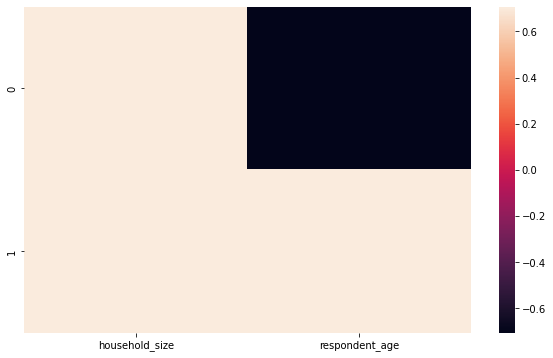

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(fin_data1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'First Principle Component ')

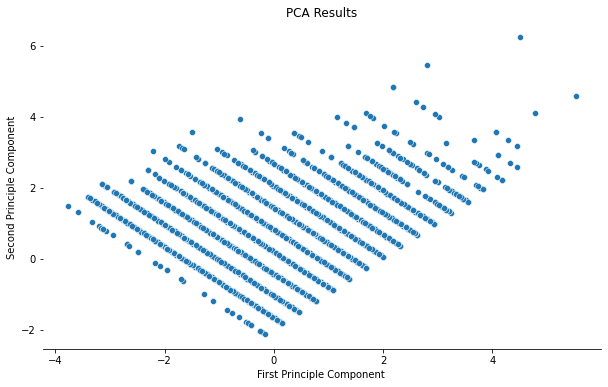

In [ ]:
plt.figure(figsize=(10,6))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA Results')
ty.set_ylabel('Second Principle Component ')
ty.set_xlabel('First Principle Component ')

In [ ]:


pca_x



array([[ 0.42258639, -0.84453902],
       [-0.92636264,  1.74531371],
       [ 0.95741211, -0.13846104],
       ...,
       [ 0.91459905, -0.09564798],
       [ 1.40661172,  0.65324306],
       [ 2.76542012,  1.15579021]])

In [ ]:

# we have library function to perform PCA
# n_component ---tranform your fin_clean to two features(dimension)
from sklearn.decomposition import PCA
pca = PCA(n_components=6)   

In [ ]:
encode= {"has_a_bank_account": {"Yes":1, "No":0}, "gender_of_respondent":{"Male":1, "Female":0},
         "country":{"Kenya":0,"Uganda":1,"Tanzania":2,"Rwanda":3},
         "cell_phone_access":{"Yes":1,"No":0},"type_of_location": {"Rural":1,"Urban":0},
         "level_of_educuation":{"No formal education":0,"Primary education":1,"Secondary education":2,
                                "Vocational/Specialised training":3,"Tertiary education":4,"Other/Don't know/RTA":5},
         "the_relationship_with_head":{"Head of household":0,"Child":1,"Parent":2,"Spouse":3,"Other relative":4,"Other non-relatives":5},
         "marital_status":{"Married/Living together":0,"Single/Never Married":1,"Divorced/Separated":2,"widowed":3,"Dont know":4}}

  
    

In [ ]:
# Once you fit/determine the number of components you want to apply in you data, then fit your scaled data
pca.fit(fin_clean)

In [ ]:
# The next step is to now tranform  this data to its 2 components
pca_transform = pca.transform(scaled_data)

In [ ]:
# In sklearn,variation is calculated  as 
# (measurement - mean)2/the number of measurement

In [ ]:
# Visualizing the 2 dimensions
plt.figure(figsize=(8,6))
plt.scatter(pca_transform[:,0],pca_transform[:,1],c=cancer_df['target'],cmap ='plasma')
plt.xlabel('First component')
plt.ylabel('Second component')

In [ ]:
# Interpretating the compents

In [ ]:
 # How do we tell how much each data point contribute to a compononent
 per_var = np.round(pca.explained_variance_ratio_*100,decimals= 1)
 labels = ['PC' + str(x) for  x in range(1, len(per_var)+1)]

In [ ]:
plt.figure(figsize=(14,6))

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentatge of Explained Variance')
plt.xlabel('Principal Componet')
plt.title('Scree plot')
plt.show()